Final version of Figure 2 of paper for PNAS submission, joining 1951-1979 v 1980-2007 and 1980-1993 v 1994-2007 change subplots into a single master figure.

In [57]:
import itertools
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import time
import os
from shutil import copy

%matplotlib inline

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin"
rdapath = "APHRO_ZH_front_025deg_V1101."

In [3]:
## start by loading all precipitation data for each year.
P = np.zeros((365,80,72,57))
P_band = np.zeros((365,80,72,57))
P_local = np.zeros((365,80,72,57))

for yr in range(1951,2008):
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(yr) + '.nc'
    print(filename),
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P[:,:,:,yr-1951] = myf['P'][:365,:,:]
    P_band[:,:,:,yr-1951] = myf['P_band1'][:365,:,:] + myf['P_band2'][:365,:,:]
    P_local[:,:,:,yr-1951] = myf['P_leftover'][:365,:,:]
    
    myf.close()

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

In [51]:
## streamline the code below
def decadal_change(precip,season,y1,y2):
    print(season[0])
    print(type(season[0]))
    print(type(y1))
    p1 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y1[0]-1951:y1[1]-1950], axis = 3), axis = 0)
    p2 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y2[0]-1951:y2[1]-1950], axis = 3), axis = 0)
    return p2-p1

1
<class 'int'>
<class 'list'>
144.587289543
-687.224272494
[1, 365]
1
<class 'int'>
<class 'list'>
93.1327638471
-78.2687048375
[1, 365]
1
<class 'int'>
<class 'list'>
70.0832729702
-665.903006866
[1, 365]
1
<class 'int'>
<class 'list'>
626.695939862
-207.968398927
[1, 365]
1
<class 'int'>
<class 'list'>
193.686226047
-131.114608829
[1, 365]
1
<class 'int'>
<class 'list'>
561.645986523
-109.837951419
[1, 365]
121
<class 'int'>
<class 'list'>
42.7760782218
-98.2771131236
[121, 160]
121
<class 'int'>
<class 'list'>
34.1133228227
-85.1284140139
[121, 160]
121
<class 'int'>
<class 'list'>
32.2259981526
-89.2292515303
[121, 160]
121
<class 'int'>
<class 'list'>
118.849355174
-93.9295643327
[121, 160]
121
<class 'int'>
<class 'list'>
68.4259170992
-71.3934351506
[121, 160]
121
<class 'int'>
<class 'list'>
74.1636370322
-40.7985839966
[121, 160]
161
<class 'int'>
<class 'list'>
78.406216784
-112.555592759
[161, 200]
161
<class 'int'>
<class 'list'>
61.9239222796
-61.8598455361
[161, 200]
161

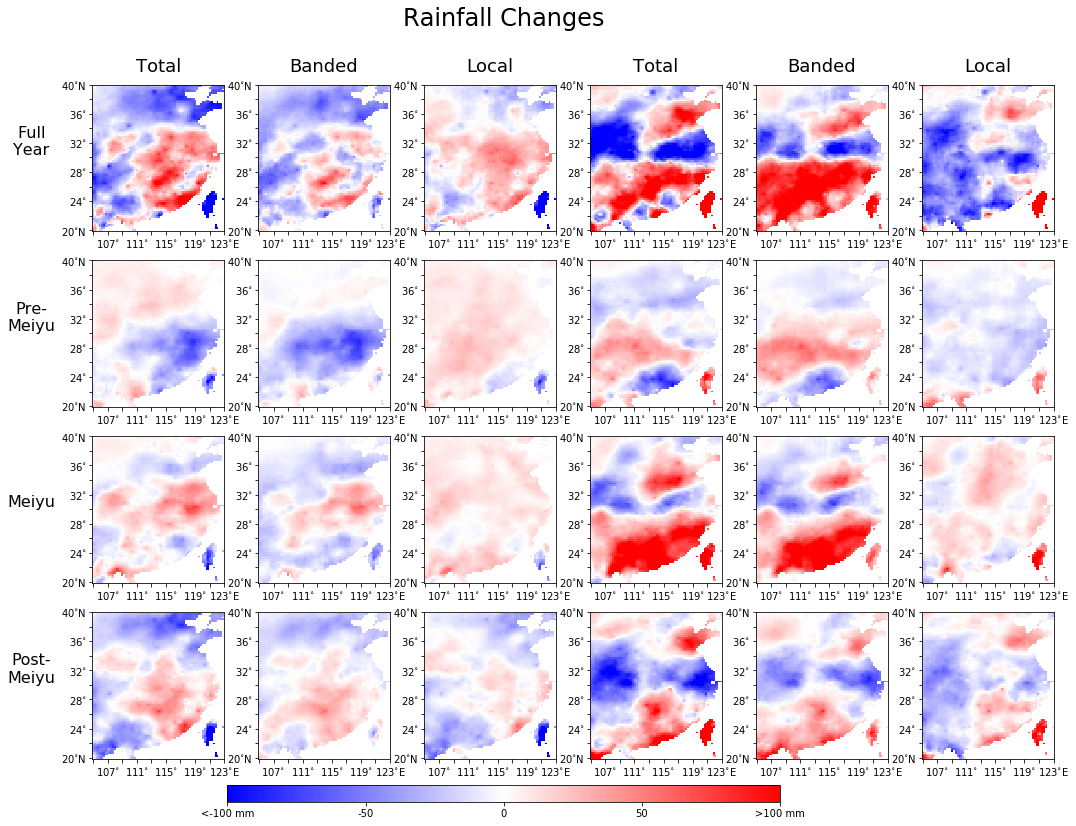

In [56]:
## PLOTTING
## Now plotting all 24 panels of master plot all at once, with left-hand panel of 12 being 1980-2007 v 1951-1979,
## and right-hand panel being 1994-2007 v 1980-1993.


## create one big figure behind subpanels
fig, axes = plt.subplots(4,6,figsize=(19.2,12), facecolor='w')
st = plt.suptitle("Rainfall Changes", size = 24, y=.97)

## Order variables for plotting
P_tuple = [P, P_band, P_local]*8
seasons = itertools.chain.from_iterable([[[1,365]]*6,[[121,160]]*6,[[161,200]]*6,[[201,273]]*6])

## Arrange year tuples
years = {'a':[[1951,1979],[1980,2007]],'b':[[1980,1993],[1994,2007]]}
year_selection = qq = 4*(3*['a']+3*['b'])

## Arrange selection of years correctly for each subplot
years = {'a':[[1951,1979],[1980,2007]],'b':[[1980,1993],[1994,2007]]}
year_selection = qq = 4*(3*['a']+3*['b'])

## lists of the characteristics for each subplot - what column is being plotted, title and labels.
titles = ["Total","Banded","Local"]*2 + ['']*18

## Create x-axis labels (which include line break as \n)
season_names = ['Full\nYear','Pre-\nMeiyu','Meiyu','Post-\nMeiyu']
temp_labels = [ [s]+5*[''] for s in season_names ] 
ylabels = [x for y in temp_labels for x in y]

## change x-axis and y-axis tick marks to be correct
xtickpos = np.linspace(0,72,10)
ytickpos = np.linspace(0,80,11)
xticklabels = ["","107$\!^\circ$","","111$\!^\circ$","","115$\!^\circ$","","119$\!^\circ$","","123$\!^\circ\!$E"]
yticklabels = ["20$\!^\circ\!$N","","24$\!^\circ$","","28$\!^\circ$","","32$\!^\circ$","","36$\!^\circ$","","40$\!^\circ\!$N"]


## cycle through each set of axes and make correct plot
for ax, precip, season, title, yr_set, ylabel in zip(axes.reshape(-1), P_tuple, seasons, titles, year_selection,ylabels):
    plt.sca(ax)
    dc = decadal_change(precip,season,years[yr_set][0],years[yr_set][1])
    print(np.nanmax(dc))
    print(np.nanmin(dc))
    print(season)
    im = plt.imshow(dc, origin = 'lower', vmax=100, vmin=-100, cmap = 'bwr')
    ax.set_title(title, fontsize=18, y = 1.05)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=30, rotation='horizontal')
    ax.set_xticks(xtickpos)
    ax.set_xticklabels(xticklabels)
    ax.set_yticks(ytickpos)
    ax.set_yticklabels(yticklabels)
    ax.tick_params(axis='y', which='major', pad=2)

fig.subplots_adjust(bottom=0.1)
fig.subplots_adjust(left=0.2)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, ticks=[-100, -50, 0, 50, 100], orientation='horizontal')
cb.ax.set_xticklabels(['<-100 mm', -50, 0, 50, '>100 mm'])  # horizontal colorbar

In [63]:
grid_left = gridspec.GridSpec(4, 3)
grid_right = gridspec.GridSpec(4, 3)